In [42]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statistics import mean, variance, pvariance
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

In [13]:
data = pd.read_csv('processedsmartphoneinfo.csv', sep = ";")
data = data.sample(frac=1).reset_index(drop=True)

traindata = data[:-51]
testdata = data[230:]

Xtrain = traindata.drop('price', axis = 1)
ytrain = traindata[['price']]

Xtest = testdata.drop('price', axis = 1)
ytest = testdata[['price']]

In [48]:
ctf = RandomForestRegressor(n_estimators = 50)
ctf.fit(Xtrain, ytrain.values.ravel())
ypredict = ctf.predict(Xtest)
flattentest = ytest.values.ravel()
# print(ytest.values.ravel().shape)
# print(ypredict.shape)
mean_absolute_error(flattentest, ypredict)

0.6442611764705892

[1.3101999999999947, 0.0006000000000012662, -0.4460000000000024, -0.04600000000000648, 0.30600000000000005, -2.1623600000000067, -0.7183599999999952, -0.8081799999999992, -0.09219999999999984, 0.5349199999999996, 0.10399999999998855, -0.044379999999999864, -0.782799999999999, -4.685080000000008, 0.4299999999999926, -0.22320000000000007, -0.2300000000000031, -0.389759999999999, 0.12200000000000699, 0.05799999999999628, -0.7241799999999987, -0.16417999999999733, -3.2523600000000066, 0.07963999999999949, -0.46400000000000396, 1.1000000000000014, 0.0027999999999992475, 0.44200000000001083, -2.520000000000005, -0.006400000000001516, -1.1220000000000052, 0.1516400000000031, -0.43199999999999683, -0.3220000000000036, 0.8979999999999988, -0.8240000000000034, -0.1740000000000066, 0.17599999999999483, -0.2755599999999996, -0.23908000000000484, 0.11100000000000088, 0.3120000000000007, -0.2556200000000004, -0.32600000000000406, -0.7097400000000018, -0.3569000000000031, 2.4659999999999993, 0.157459

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


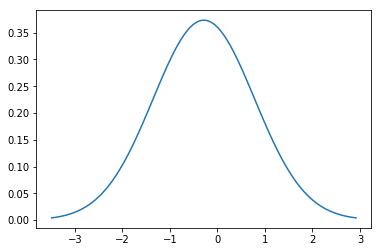

-0.286603921568629
1.1412654406243163


In [56]:
err = []
for idx in range(len(flattentest)):
    err.append(flattentest[idx]-ypredict[idx])
print (err)
mu = mean(err) #mean_absolute_error(flattentest, ypredict)
var = variance(err) #mean_squared_error(flattentest, ypredict)
sigma = math.sqrt(var)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print (mu)
print (var)